In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
# Change working directory to be current folder
import os
os.chdir('/content/gdrive/My Drive/Practice Module/Violence-Detection')
pwd = os.getcwd()
print(pwd)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Practice Module/Violence-Detection


In [2]:
import cv2
import os
from glob import glob
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

from random import shuffle
#from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.layers import Activation, Conv3D, Dense, Dropout, Flatten, MaxPooling3D
from tensorflow.keras.losses import categorical_crossentropy, binary_crossentropy
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

# Check GPU coinfiguration in Colab
print("Tensorflow version: ", tf.__version__)
print(tf.test.gpu_device_name())

Tensorflow version:  2.8.0
/device:GPU:0


In [3]:
with np.load("datasets/c3d_train_150f.npz") as npzfile:
    x_train = npzfile["X"]
    y_train = npzfile["Y"]
    
with np.load("datasets/c3d_test_150f.npz") as npzfile:
    x_val = npzfile["X"]
    y_val = npzfile["Y"]

with np.load("datasets/c3d_val_150f.npz") as npzfile:
    x_test = npzfile["X"]
    y_test = npzfile["Y"]    
    
print("Training data", x_train.shape, y_train.shape)
print("Validation data", x_val.shape, y_val.shape)
print("Testing data", x_test.shape, y_test.shape)

Training data (1280, 32, 32, 10, 1) (1280, 2)
Validation data (320, 32, 32, 10, 1) (320, 2)
Testing data (400, 32, 32, 10, 1) (400, 2)


In [4]:
c3d_model = load_model('c3d_model.hdf5')
model_name = 'c3d_model_150f'

In [5]:
folderpath      = pwd+'/'
filepath        = folderpath + model_name + "_weights.h5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_accuracy', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')

csv_logger      = CSVLogger(folderpath+model_name +'.csv')                       # Step 2
callbacks_list  = [checkpoint,csv_logger]                                       # Step 3

print("Callbacks created:")
print(callbacks_list[0])
print(callbacks_list[1])
print('')
print("Path to model:", filepath)
print("Path to log:  ", folderpath+model_name+'_history.csv')

Callbacks created:

Path to model: /content/gdrive/My Drive/Practice Module/Violence-Detection/c3d_model_150f_weights.h5
Path to log:   /content/gdrive/My Drive/Practice Module/Violence-Detection/c3d_model_150f_history.csv


In [6]:
batch_size = 64
epochs = 100
verbosity = 2
history = c3d_model.fit(x_train, y_train, 
                        validation_data=(x_val, y_val), 
                        batch_size=batch_size, 
                        epochs=epochs, 
                        verbose=verbosity, 
                        shuffle=True,
                        callbacks=callbacks_list)

c3d_model.load_weights(filepath)                                                # load the best weights
scores = c3d_model.evaluate(x_val, y_val, verbose=1)
print(f'Validation Score: {c3d_model.metrics_names[0]} of {scores[0]}; {c3d_model.metrics_names[1]} of {scores[1]*100}%')

Epoch 1/100
20/20 - 3s - loss: 0.1962 - accuracy: 0.9266 - val_loss: 0.6444 - val_accuracy: 0.7656 - 3s/epoch - 167ms/step
Epoch 2/100
20/20 - 1s - loss: 0.2049 - accuracy: 0.9227 - val_loss: 0.7404 - val_accuracy: 0.7844 - 899ms/epoch - 45ms/step
Epoch 3/100
20/20 - 1s - loss: 0.2195 - accuracy: 0.9141 - val_loss: 0.7103 - val_accuracy: 0.7656 - 824ms/epoch - 41ms/step
Epoch 4/100
20/20 - 1s - loss: 0.1782 - accuracy: 0.9203 - val_loss: 0.6597 - val_accuracy: 0.8000 - 900ms/epoch - 45ms/step
Epoch 5/100
20/20 - 1s - loss: 0.1709 - accuracy: 0.9344 - val_loss: 0.7542 - val_accuracy: 0.7875 - 824ms/epoch - 41ms/step
Epoch 6/100
20/20 - 1s - loss: 0.1570 - accuracy: 0.9398 - val_loss: 0.7548 - val_accuracy: 0.7688 - 821ms/epoch - 41ms/step
Epoch 7/100
20/20 - 1s - loss: 0.1452 - accuracy: 0.9477 - val_loss: 0.7863 - val_accuracy: 0.7844 - 824ms/epoch - 41ms/step
Epoch 8/100
20/20 - 1s - loss: 0.1362 - accuracy: 0.9508 - val_loss: 0.8777 - val_accuracy: 0.7937 - 821ms/epoch - 41ms/step
Ep

In [7]:
# Load the unseen dataset
# Evaluate the deep learning model
c3d_model.load_weights(filepath)      # load the best weights
y_pred = c3d_model.predict(x_test, verbose=0)
print("Confusion matrix :", model_name)
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
print('Accuracy Score :', accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

Confusion matrix : c3d_model_150f
[[160  40]
 [ 62 138]]
Accuracy Score : 0.745


In [ ]:
keypoints
Validation Score: loss of 1.6859798431396484; accuracy of 77.4193525314331%
Confusion matrix
[[63 48]
 [18 93]]
Accuracy Score : 0.7027027027027027

Keypoints
Validation Score: loss of 2.351008176803589; accuracy of 68.81720423698425%
Confusion matrix
[[89 22]
 [39 72]]
Accuracy Score : 0.7252252252252253

keypoints
Validation Score: loss of 1.9711973667144775; accuracy of 76.88171863555908%
Confusion matrix
[[74 37]
 [16 95]]
Accuracy Score : 0.7612612612612613

opt_flow
Validation Score: loss of 2.353903293609619; accuracy of 69.9999988079071%
Confusion matrix
[[51 60]
 [41 70]]
Accuracy Score : 0.545045045045045

60f
Validation Score: loss of 1.3408217430114746; accuracy of 79.3749988079071%
Confusion matrix
[[163  37]
 [ 65 135]]
Accuracy Score : 0.745

90f
Validation Score: loss of 0.7992514371871948; accuracy of 84.375%
Confusion matrix : c3d_model_90f
[[163  37]
 [ 61 139]]
Accuracy Score : 0.755

120f
Validation Score: loss of 0.7328950762748718; accuracy of 83.74999761581421%
Confusion matrix
[[162  38]
 [ 62 138]]
Accuracy Score : 0.75

150f
Confusion matrix
[[164  36]
 [ 63 137]]
Accuracy Score : 0.7525

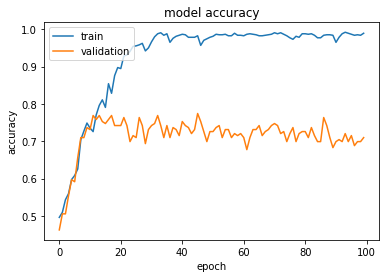

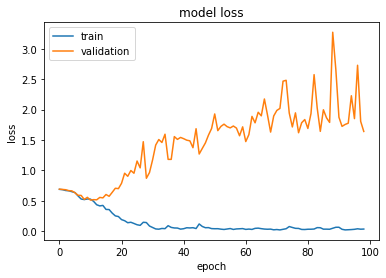

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.savefig('c3d_rgb_accuracy.eps', format='eps', dpi=1000)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.savefig('c3d_rgb_loss.eps', format='eps', dpi=1000)
plt.show()

In [ ]:
# Analysis

In [ ]:
import pandas as pd
df_history = pd.DataFrame(history.history, columns=['loss', 'accuracy', 'val_loss', 'val_accuracy'])
df_history.to_csv('results/'+model_name+'.csv')

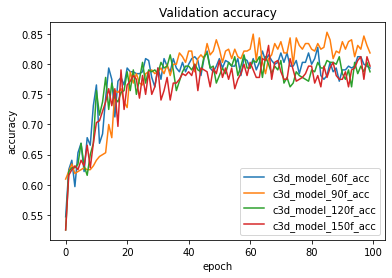

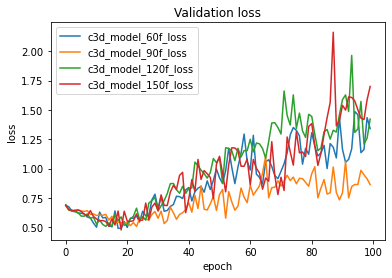

In [ ]:
files1 = ['c3d_model_60f', 'c3d_model_90f', 'c3d_model_120f', 'c3d_model_150f']
files2 = ['c3d_model_120f', 'c3d_model_opt_flow', 'c3d_model_keypoints']

loss, acc = pd.DataFrame(), pd.DataFrame()
for file in files1:

    history = pd.read_csv('results/'+file+'.csv')
    col_loss = file+'_loss'
    history = history.rename(columns ={'val_loss':col_loss})
    loss = pd.concat([loss, history[col_loss]], axis=1)

    col_acc = file+'_acc'
    history = history.rename(columns ={'val_accuracy':col_acc})
    acc = pd.concat([acc, history[col_acc]], axis=1)

plt.plot(acc)
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(acc.columns, loc='lower right')
#plt.savefig('c3d_rgb_accuracy.eps', format='eps', dpi=1000)
plt.show()
# # summarize history for loss
plt.plot(loss)
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loss.columns, loc='upper left')
#plt.savefig('c3d_rgb_loss.eps', format='eps', dpi=1000)
plt.show()

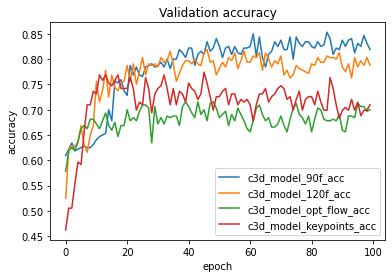

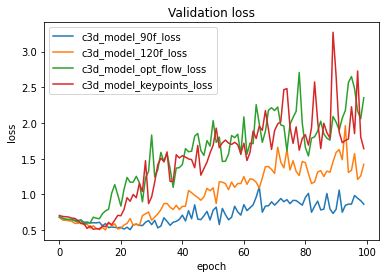

In [ ]:
files1 = ['c3d_model_60f', 'c3d_model_90f', 'c3d_model_120f', 'c3d_model_150f']
files2 = ['c3d_model_90f','c3d_model_120f', 'c3d_model_opt_flow', 'c3d_model_keypoints']

loss, acc = pd.DataFrame(), pd.DataFrame()
for file in files2:

    history = pd.read_csv('results/'+file+'.csv')
    col_loss = file+'_loss'
    history = history.rename(columns ={'val_loss':col_loss})
    loss = pd.concat([loss, history[col_loss]], axis=1)

    col_acc = file+'_acc'
    history = history.rename(columns ={'val_accuracy':col_acc})
    acc = pd.concat([acc, history[col_acc]], axis=1)

plt.plot(acc)
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(acc.columns, loc='lower right')
#plt.savefig('c3d_rgb_accuracy.eps', format='eps', dpi=1000)
plt.show()
# # summarize history for loss
plt.plot(loss)
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loss.columns, loc='upper left')
#plt.savefig('c3d_rgb_loss.eps', format='eps', dpi=1000)
plt.show()